In [52]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings

In [53]:
train_data = pd.read_csv("train_data.csv.csv")
test_data = pd.read_csv("test_data.csv.csv")

In [54]:
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [55]:
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [56]:
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [57]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [58]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [59]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


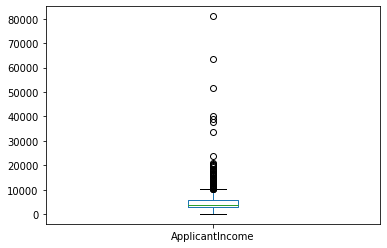

In [60]:
train_data['ApplicantIncome'].plot.box()

Text(0.5, 0.98, ' ')

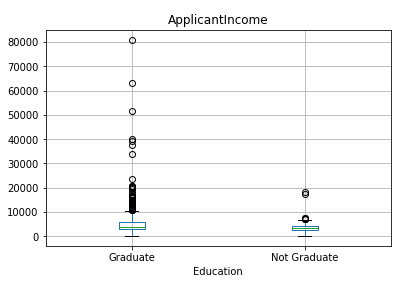

In [61]:
train_data.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle(" ")

Text(0.5, 0.98, ' ')

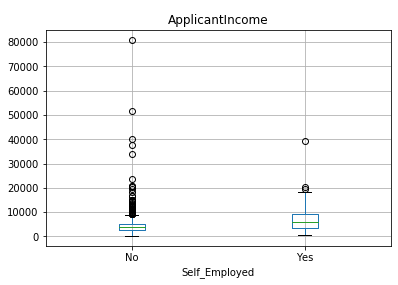

In [62]:
train_data.boxplot(column='ApplicantIncome', by = 'Self_Employed')
plt.suptitle(" ")

In [63]:
train = train_data

In [64]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace= True)
train['Married'].fillna(train['Married'].mode()[0], inplace= True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace= True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace= True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace= True)

In [66]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [67]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace= True)

In [68]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [69]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [71]:
train = train.drop('Loan_ID', axis=1)

In [72]:
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status

In [73]:
X = pd.get_dummies(X)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#Cross Validation to find the best model for dataset

In [75]:
classifier = []
classifier.append(("LogisticReg", LogisticRegression(solver='liblinear', multi_class='ovr')))
classifier.append(("CART", DecisionTreeClassifier(criterion = 'entropy')))
classifier.append(("KNN", KNeighborsClassifier()))
classifier.append(("KernelSVM", SVC(gamma='auto')))
classifier.append(("NaiveBayes", GaussianNB()))
classifier.append(("RandomForest", RandomForestClassifier()))

In [92]:
#First, we define a classidifciation model which provides with accuracy and cross-validation 
def classification_m(model, data, predictor, outcome):
    model.fit(data[predictor],data[outcome])                          # To fit the model for analysis
    
    prediction = model.predict(data[predictor])                       # Make prediction on the dataset used for training
    
    accuracy = metrics.accuracy_score(prediction,data[outcome])
    print('Accuracy : %s' % '{0:0.3%}'.format(accuracy))              # Calculate accuracy based on the prediction and outcome and print it
        
        
    kf = KFold(data.shape[0], n_folds=4)                      # k-fold cross-validation with 4 folds
    error = []
    for train, test in kf:
    
        train_predictors = (data[predictor].iloc[train,:])    # Filter training data
    
    
        train_target = data[outcome].iloc[train]              # Target used to train algorithm.
    
    
        model.fit(train_predictors, train_target)             # Training the algorithm using the predictors and target data.
    
    
        error.append(model.score(data[predictor].iloc[test,:], data[outcome].iloc[test]))    #Record error during cross-validation
 
    print ('Cross-Validation Score : %s' % '{0:0.3%}'.format(np.mean(error)))

In [93]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_m(model,train_data,predictor_var,outcome_var)

Accuracy : 80.945%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


NameError: name 'KFold' is not defined

In [87]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_m(model, train_data,predictor_var,outcome_var)

ValueError: could not convert string to float: 'Male'